# Ajuste de curvas

# Objetivos

> - Ayudar a los prestatarios en la toma de decisiones en el área creditica
> - Pronosticar la probabilidad de inclumplimiento de los participantes
> - Servira para la mejora y optimización de puntaje crediticio

## Objetivo General

>  Construir un modelo matematico para que los prestamistas puedan tomar mejores decisiones financieras

### Objetivos Específicos

> - Ayudarnos de un clasificador binario para separar a los participantes que pagarían el crédito de los que no.
> - Definir variables de interes según la clasificación

# Modelo: Ajuste de curvas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             f1_score,accuracy_score)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import scipy.spatial.distance as sc
from sklearn import svm,datasets

In [4]:
Credit_file = 'cs-training.csv'
Credit = pd.read_csv(Credit_file,low_memory=False)
Credit

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [3]:
columns = pd.DataFrame(list(Credit.columns.values), 
                       columns = ['Columns Names'])
columns

,Columns Names
0,Unnamed: 0
1,SeriousDlqin2yrs
2,RevolvingUtilizationOfUnsecuredLines
3,age
4,NumberOfTime30-59DaysPastDueNotWorse
5,DebtRatio
6,MonthlyIncome
7,NumberOfOpenCreditLinesAndLoans
8,NumberOfTimes90DaysLate
9,NumberRealEstateLoansOrLines


In [5]:
data_types = pd.DataFrame(Credit.dtypes,
                          columns= ['Data Type'])
data_types

,Data Type
Unnamed: 0,int64
SeriousDlqin2yrs,int64
RevolvingUtilizationOfUnsecuredLines,float64
age,int64
NumberOfTime30-59DaysPastDueNotWorse,int64
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int64
NumberOfTimes90DaysLate,int64
NumberRealEstateLoansOrLines,int64


In [6]:
missing_data_counts = pd.DataFrame(Credit.isnull().sum(),
                                           columns = ['Missing Values'])
missing_data_counts

,Missing Values
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [7]:
present_data_counts = pd.DataFrame(Credit.count(), columns = ['Present Values'])
present_data_counts

,Present Values
Unnamed: 0,150000
SeriousDlqin2yrs,150000
RevolvingUtilizationOfUnsecuredLines,150000
age,150000
NumberOfTime30-59DaysPastDueNotWorse,150000
DebtRatio,150000
MonthlyIncome,120269
NumberOfOpenCreditLinesAndLoans,150000
NumberOfTimes90DaysLate,150000
NumberRealEstateLoansOrLines,150000


In [8]:
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(Credit.columns.values): 
    unique_value_counts.loc[v]=[Credit[v].unique()]   
unique_value_counts

,Unique Values
Unnamed: 0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
SeriousDlqin2yrs,"[1, 0]"
RevolvingUtilizationOfUnsecuredLines,"[0.7661266090000001, 0.9571510190000001, 0.658..."
age,"[45, 40, 38, 30, 49, 74, 57, 39, 27, 51, 46, 7..."
NumberOfTime30-59DaysPastDueNotWorse,"[2, 0, 1, 3, 4, 5, 7, 10, 6, 98, 12, 8, 9, 96,..."
DebtRatio,"[0.8029821290000001, 0.12187620099999999, 0.08..."
MonthlyIncome,"[9120.0, 2600.0, 3042.0, 3300.0, 63588.0, 3500..."
NumberOfOpenCreditLinesAndLoans,"[13, 4, 2, 5, 7, 3, 8, 9, 6, 10, 14, 22, 17, 1..."
NumberOfTimes90DaysLate,"[0, 1, 3, 2, 5, 4, 98, 10, 9, 6, 7, 8, 15, 96,..."
NumberRealEstateLoansOrLines,"[6, 0, 1, 3, 4, 2, 5, 8, 7, 9, 17, 15, 10, 12,..."


In [9]:
minium_values = pd.DataFrame(columns=['Minium Values'])
for v in list(Credit.columns.values):
    minium_values.loc[v]=[Credit[v].min()]
minium_values

,Minium Values
Unnamed: 0,1
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [10]:
maxium_values = pd.DataFrame(columns=['Maxium Values'])
for v in list(Credit.columns.values):
    maxium_values.loc[v]=[Credit[v].max()]
maxium_values

,Maxium Values
Unnamed: 0,150000
SeriousDlqin2yrs,1
RevolvingUtilizationOfUnsecuredLines,50708
age,109
NumberOfTime30-59DaysPastDueNotWorse,98
DebtRatio,329664
MonthlyIncome,3.00875e+06
NumberOfOpenCreditLinesAndLoans,58
NumberOfTimes90DaysLate,98
NumberRealEstateLoansOrLines,54


In [11]:
data_quality_report = data_types.join(missing_data_counts).join(present_data_counts).join(unique_value_counts).join(minium_values).join(maxium_values)
data_quality_report

,Data Type,Missing Values,Present Values,Unique Values,Minium Values,Maxium Values
Unnamed: 0,int64,0,150000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,150000
SeriousDlqin2yrs,int64,0,150000,"[1, 0]",0,1
RevolvingUtilizationOfUnsecuredLines,float64,0,150000,"[0.7661266090000001, 0.9571510190000001, 0.658...",0,50708
age,int64,0,150000,"[45, 40, 38, 30, 49, 74, 57, 39, 27, 51, 46, 7...",0,109
NumberOfTime30-59DaysPastDueNotWorse,int64,0,150000,"[2, 0, 1, 3, 4, 5, 7, 10, 6, 98, 12, 8, 9, 96,...",0,98
DebtRatio,float64,0,150000,"[0.8029821290000001, 0.12187620099999999, 0.08...",0,329664
MonthlyIncome,float64,29731,120269,"[9120.0, 2600.0, 3042.0, 3300.0, 63588.0, 3500...",0,3.00875e+06
NumberOfOpenCreditLinesAndLoans,int64,0,150000,"[13, 4, 2, 5, 7, 3, 8, 9, 6, 10, 14, 22, 17, 1...",0,58
NumberOfTimes90DaysLate,int64,0,150000,"[0, 1, 3, 2, 5, 4, 98, 10, 9, 6, 7, 8, 15, 96,...",0,98
NumberRealEstateLoansOrLines,int64,0,150000,"[6, 0, 1, 3, 4, 2, 5, 8, 7, 9, 17, 15, 10, 12,...",0,54


In [12]:
#Seleccionar las variables que tienen datos completos
Creditcomplete1 = Credit.iloc[:,2:6]
Creditcomplete2 = Credit.iloc[:,7:11]

In [13]:
#Juntar las variables completas para un mejor análisis de los datos
Creditquant =  pd.DataFrame(np.c_[Creditcomplete1,Creditcomplete2])

In [14]:
#Se de ben normalizar los datos para después hacer selección homogénea de manera más óptima
Creditquant_norm = (Creditquant-Creditquant.mean(axis=0))/Creditquant.std(axis=0)

In [15]:
# Aplicar el PCA, hay que proyectar nuevos ejes
data = Creditquant_norm
media = data.mean(axis=0)
datam = data-media
data_cov = np.cov(datam.transpose())
w,v = np.linalg.eig(data_cov)

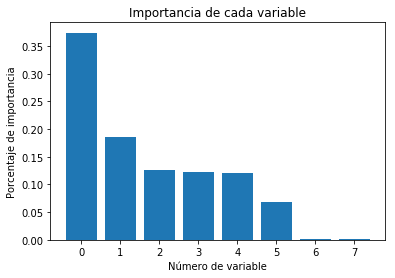

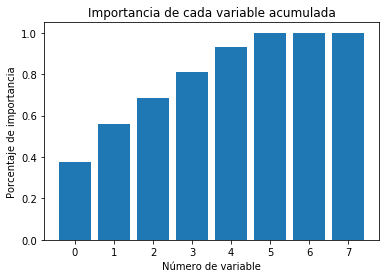

In [16]:
# Obtener un porcentaje de importancia de los componentes
indx = np.argsort(w)[::-1]
w = w[indx]
v = v[indx]
porcentaje = w/np.sum(w) #Vectores propios sólo te dicen la dirección, y la magnitud dle vector propio te dice la importancia
porcentaje_acum = np.cumsum(porcentaje)

plt.bar(np.arange(len(porcentaje)),porcentaje)
plt.xlabel("Número de variable")
plt.ylabel("Porcentaje de importancia")
plt.title("Importancia de cada variable")
plt.show()
plt.bar(np.arange(len(porcentaje_acum)),porcentaje_acum)
plt.xlabel("Número de variable")
plt.ylabel("Porcentaje de importancia")
plt.title("Importancia de cada variable acumulada")
plt.show()
plt.show()

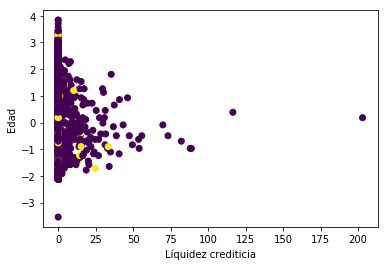

In [17]:
#Selección de variables de acuerdo a su nivel de importancia
X = Creditquant_norm.iloc[:,0:2]
Y = Credit.iloc[:,1]
plt.scatter(X[0],X[1],c=Y) #se le quita 2:" porque no es un arreglo sino un dataframe
plt.xlabel('Líquidez crediticia') #en la base de dato la columna que tiene 0's y 1's, es la clase, por ejemplo si pagaron y no pagaron
plt.ylabel('Edad')
plt.show()

In [18]:
#%% Preparación de los datos (Creando el polinomoio) para regresión lineal
ngrado = 3 #grado del polinomiio que vamos a proponer
poly = PolynomialFeatures(ngrado)
Xa = poly.fit_transform(X)

In [19]:
#%% Crear y entrenar la regresión logística
logreg = linear_model.LogisticRegression(C=1e10) #Se crea el modelo  logístico, regresión
logreg.fit(Xa,Y) #se entrena el modelo
#Ya se hizo la minimización

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

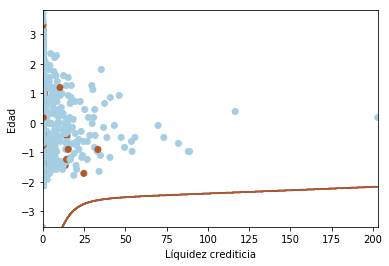

In [22]:
#%%Opcional (Dibujar la frontera)
h = 0.01 # intervalo
xmin,xmax = X[0].min(),X[0].max()
ymin,ymax = X[1].min(),X[1].max()
xx, yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

Xnew = pd.DataFrame(np.c_[xx.ravel(),yy.ravel()])
Xm = poly.fit_transform(Xnew)

Z = logreg.predict(Xm)
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.contour(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[0],X[1],c=Y,cmap=plt.cm.Paired)
plt.xlabel('Líquidez crediticia')
plt.ylabel("Edad")
plt.xlim()
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

In [23]:
#%% Evaluación del modelo
Yg = logreg.predict(Xa)
Yp = logreg.predict_proba(Xa)

In [25]:
accuracy_score(Y,Yg)

0.93316

## Conclusiones

<b><u>De acuerdo a los procesos realizados seleccionamos dos variables importantes para la clasificación, aplicamos tambien el método de PCA, para evaluar el nivel de exactitud de nuestro modelo. Nuestro proyecto tiene como supuesto principal que la mayoría de las personas son aptas para un crédito.</u></b>

## Referencias

>  Kaggel. (2012). Give Me Some Credit. Febrero, 2018, de Kaggel Sitio web: https://www.kaggle.com/c/GiveMeSomeCredit

<b> <H1 align="center"> Programación lineal</H1>
 </b>

# Objetivos


> - Mediante graficos obtener de manera visual los puntos.
> - Utilizar el metodo de programación lineal para aumentar la productividad del plan de alimentos

## Objetivo General

> - Optimizar la productividad del plan de alimento

### Objetivos Específicos


> - Utilizacion de graficos.
> - Minimizar el costo de la comida

## Problema 

Un nutriólogo planea un menú que incluye los alimentos A y B como partes principales. Supongamos que cada onza 
del alimento A contiene 2 unidades de proteína, 1 unidad de hierro y una unidad de tiamina, cada onza del alimento B contiene 1 unidad de proteína, una unidad de hierro y 3 unidades de tiamina.
   
Supongamos que cada onza de A cuesta 30 centavos mientras cada onza de B cuesta 40 centavos. El nutriólogo
quiere que la comida proporcione al menos 12 unidades de proteína, 9 unidades de hierro y al menos 15 de 
tiamina.
¿Cuántas onzas de cada uno de los alimentos debe de emplearse para minimizar el costo de la comida?</pre>

# Datos

<table class="egt">

  <tr>

    <th>X</th>

    <th>Y</th>


  </tr>

  <tr>

    <td>2 onzas proteina</td>

    <td>1 onza de proteina</td>


  </tr>

  <tr>

    <td>1 onza de hierro</td>

    <td>1 onza de hierro</td>

   

  </tr>

  <tr>

    <td>1 onza de tiamina</td>

    <td>3 onza de tiamina</td>

  </tr>
   <tr>

    <td>30 centavos  onza</td>

    <td>40 centavos onza</td>



</table>

In [35]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

\begin{equation}
\begin{array}{ll}
\min_{x,y} & +x+y \\
\text{s. a. }  & 2x+y\ge 12 \\
              & x + y\ge 9 \\
              & x+3y\ge 15 \\
              & x\ge 0\\
              & y\ge 0,
\end{array}
\end{equation}

In [36]:
def x1_v1(x):
    return (12 - 2*x) # se despeja x2 ecuacion 1
def x2_v2(x):
    return (9 - x) # se despeja x2 ecuacion 1
def x3_v3(x):
    return ((15 - x)/3) # se despeja x2 ecuacion 1

In [37]:
x1 = np.linspace(-10, 20)

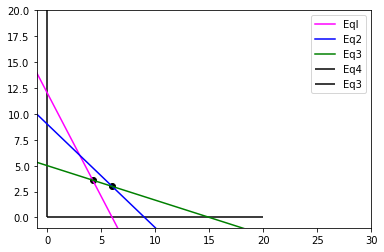

In [38]:
plt.plot(x1, x1_v1(x1), 'magenta', label = "Eql") #desigualdad 1
plt.plot(x1, x2_v2(x1), 'b', label = "Eq2") #desigualdad 1
plt.plot(x1, x3_v3(x1), 'g', label = "Eq3") #desigualdad 1



plt.hlines(0,0,20, label = "Eq4", color = "k")
plt.vlines(0,0,20, label = "Eq3", color= "k")
plt.xlim(xmin=-1,xmax=30)
plt.ylim(ymin=-1,ymax=20)
plt.scatter([6], [3], color = 'black')
plt.scatter([4.2], [3.6], color = 'black')






plt.legend()
plt.show()

In [39]:
import scipy.optimize as opt

In [40]:
c = np.array([-1, -1])
A = np.array([[2,1], [1,1],[1,3]])
b = np.array([12, 9,15])
x1_bound = (0, None)
x2_bound = (0, None)


In [41]:
res = opt.linprog(c, A_ub=A, b_ub=b, bounds=(x1_bound, x2_bound), options={'disp':True})


Optimization terminated successfully.
         Current function value: -7.800000   
         Iterations: 2


In [42]:
res

     fun: -7.8
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0. , 1.2, 0. ])
  status: 0
 success: True
       x: array([4.2, 3.6])

## Conclusiones

De acuerdo a los datos recabados en el problema utilizamos el metodo de programación lineal para minimizar los costos.

## Referencias

> Hillier, F. S., Lieberman, G. J., & Osuna, M. A. G. (1997). Introducción a la Investigación de Operaciones (Vol. 1). McGraw-Hill.

<b> <H1 align="center"> Optimización</H1>
 </b>

> - Determinar el tamaño del pedido tomando en cuenta que se busca el costo minimo

## Objetivo General

> - minimizar el costo total de la producción

### Objetivos Específicos

>  Utilizar metodos aprendidos en calculo y aplicarlos.

## Problema 

In [52]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import pandas as pd
%matplotlib inline

El costo total (en miles de pesos) de pedido y almacenaje de x automoviles es de 

$$C(x) = 4x + 720 + 921600/x $$

Determine el tamaño del pedido que minimiza el costo total 

In [54]:
sym.var('x', real = True)

x

In [55]:
def c(x):
    return 4*x + 720 + 921600/x

<b>Sacamos la primer derivada </b>

In [57]:
dc = sym.diff(c(x) ,x)
dc

4 - 921600/x**2

<b>Después sacamos los puntos críticos igualando a cero nuestra primer derivada </b>

In [59]:
IgualamosACero = sym.solve(dc, x)
IgualamosACero

[-480, 480]

Como no puede existir un pedido de carros negativos, tomamos el número positivo
Donde $x = 480$ es el número de carros que debe tener el pedido para minimizar el costo 

In [60]:
print ("$C(480)$" , 4*480 + 720 + 921600/480)

$C(480)$ 4560.0


Donde <b><u>4560</u></b> es el costo mínimo para producir el pedido 

## Conclusiones



Por medio de ecuaciones matematicas encontramos el costo minimo para producir el pedido realizado por el cliente

## Referencias

Piskunov, N., & Medkov, K. P. (1983). Cálculo diferencial e integral (Vol. 1). Mir.